In [1]:
import pandas as pd
import statistics as stat
import math
import seaborn as sns
import matplotlib.pyplot as plt
import random

This dataset is collected from this strategic MOBA game named "League of Legends". I find it interesting because we could basically predict the outcome of each game (blueWins or redWins) based on the statistics from the first 10 minutes. I understand that a glossary might be necessary in order to explain some of the columns, I will do so as we analyze this dataset. 

In [2]:
league = pd.read_csv('high_diamond_ranked_10min.csv') #First 10 minutes of relatively competitive League games
league.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Today I will be mainly using the "blueWardsPlaced" column to verify the Central Limit Theorem of Statistics. First we need to get the population parameters.

In [3]:
league['blueWardsPlaced'].describe()

count    9879.000000
mean       22.288288
std        18.019177
min         5.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       250.000000
Name: blueWardsPlaced, dtype: float64

In [4]:
# The 3 parameters I choose for this assignment

population_count = len(league['blueWardsPlaced'])
pop_mean = stat.mean(league['blueWardsPlaced'])
pop_median = stat.median(league['blueWardsPlaced'])
pop_std = stat.pstdev(league['blueWardsPlaced'])
print("Population mean =",pop_mean)
print("Population median =",pop_median)
print("Population standard deviation =",pop_std)

Population mean = 22.28828828828829
Population median = 16
Population standard deviation = 18.018264498769625


This estimate function below calculates lists of the three parameters we are interested in, based on the sample size and sample count.

In [5]:
def estimates(sample_size,sample_count):
    sample_mean_list = []
    sample_median_list = []
    sample_std_list = []
    for i in range(sample_count):
        random_list = random.sample(range(0, 9879), sample_size) #generate a list of indexes based on the sample size
        random_values = [league['blueWardsPlaced'][x] for x in random_list]
        # statistics of one sample, rounded to one decimal place so we can get more repeats
        sample_mean = round(stat.mean(random_values),1)
        sample_median = round(stat.median(random_values),1)
        sample_std = round(stat.pstdev(random_values),1)

        sample_mean_list.append(sample_mean)
        sample_median_list.append(sample_median)
        sample_std_list.append(sample_std)
        
    return sample_mean_list, sample_median_list, sample_std_list

First we look at the sample mean estimates of a sample count of 1000 using sample sizes 2, 5, 10 ,30

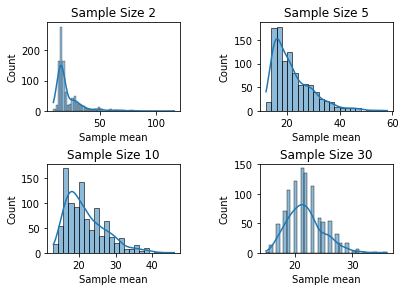

In [6]:
size2 = estimates(2,1000)[0]
size5 = estimates(5,1000)[0]
size10 = estimates(10,1000)[0]
size30 = estimates(30,1000)[0]

plt.subplot(221)
sns.histplot(size2,kde = True)
plt.title('Sample Size 2')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(222)
sns.histplot(size5,kde = True)
plt.title('Sample Size 5')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(223)
sns.histplot(size10,kde = True)
plt.title('Sample Size 10')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(224)
sns.histplot(size30,kde = True)
plt.title('Sample Size 30')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.6)

The sample mean distributions center at around 20, as expected based on the population mean. As we can see, the distributions of sample mean of small sample size are right skewed. As the sample size increases, the more the distribution resembles a normal shape (bell-curved). Thus it validates the Central Limit Theorem.

Now let's see what happens if we increase the sample count to 5000.

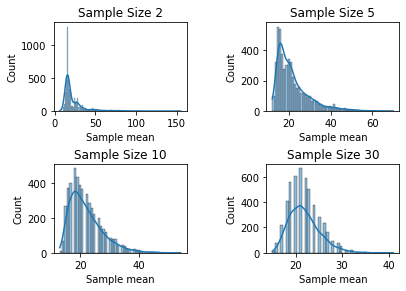

In [7]:
size2 = estimates(2,5000)[0]
size5 = estimates(5,5000)[0]
size10 = estimates(10,5000)[0]
size30 = estimates(30,5000)[0]

plt.subplot(221)
sns.histplot(size2,kde = True)
plt.title('Sample Size 2')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(222)
sns.histplot(size5,kde = True)
plt.title('Sample Size 5')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(223)
sns.histplot(size10,kde = True)
plt.title('Sample Size 10')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplot(224)
sns.histplot(size30,kde = True)
plt.title('Sample Size 30')
plt.xlabel('Sample mean')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.6)

From the plots above, we can see that the data are more dense and clustered. The curves seem to fit the histograms more. Realistically, sample count of 5000 (1/2 of our data) is very expensive and inefficient to run. It takes minutes to graph.

Now we look at the sample median estimates of a sample count of 1000 using sample sizes 5, 10 , 30, 50

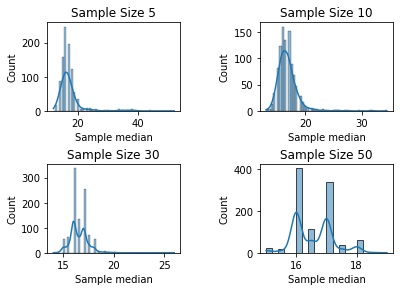

In [8]:
size5 = estimates(5,1000)[1]
size10 = estimates(10,1000)[1]
size30 = estimates(30,1000)[1]
size50 = estimates(50,1000)[1]

plt.subplot(221)
sns.histplot(size5,kde = True)
plt.title('Sample Size 5')
plt.xlabel('Sample median')
plt.ylabel('Count')
plt.subplot(222)
sns.histplot(size10,kde = True)
plt.title('Sample Size 10')
plt.xlabel('Sample median')
plt.ylabel('Count')
plt.subplot(223)
sns.histplot(size30,kde = True)
plt.title('Sample Size 30')
plt.xlabel('Sample median')
plt.ylabel('Count')
plt.subplot(224)
sns.histplot(size50,kde = True)
plt.title('Sample Size 50')
plt.xlabel('Sample median')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.6)

This is very interesting to see. The sample median distributions center at around 16. For sample median, we can see that the distributions are normal with one mode for low sample sizes (5 and 10). As we increase the sample size, the distributions become bimodal with two peaks in the graphs. It makes sense intuitively since median takes the middle value and it varies drastically depending on the sample size.

How about the sample standard deviation estimates of a sample count of 1000 using sample sizes 5, 10 , 30, 50

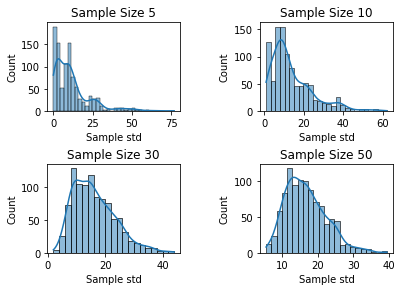

In [9]:
size5 = estimates(5,1000)[2]
size10 = estimates(10,1000)[2]
size30 = estimates(30,1000)[2]
size50 = estimates(50,1000)[2]

plt.subplot(221)
sns.histplot(size5,kde = True)
plt.title('Sample Size 5')
plt.xlabel('Sample std')
plt.ylabel('Count')
plt.subplot(222)
sns.histplot(size10,kde = True)
plt.title('Sample Size 10')
plt.xlabel('Sample std')
plt.ylabel('Count')
plt.subplot(223)
sns.histplot(size30,kde = True)
plt.title('Sample Size 30')
plt.xlabel('Sample std')
plt.ylabel('Count')
plt.subplot(224)
sns.histplot(size50,kde = True)
plt.title('Sample Size 50')
plt.xlabel('Sample std')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.6,hspace=0.6)

The sample standard deviation distributions center at around 18. As we can see, the sample standard deviation estimate displays a similar pattern compared the sample mean estimate. The distribution starts out unevenly and skewed right, and gradually converges to normal-shaped as we increase the sample size, thus verifying the CLT. Surprisingly, sample size 30 has a smoother curve than sample size 50.

## Conclusion

Overall, our experiments proved Central Limit Theorem of statistics and 30 was a good number. It seems that sample size matters more than the sample count because sample size determines how many data points we are drawing from the population, and sample count determines how many times we are drawing that amount from the population. Based on the lecture notes, estimating the standard deviation parameter is more challenging than estimating the population mean and median. However, in our experiments it is shown otherwise. Sample median is contradicting our CLT, and sample standard deviation is not. Maybe "estimating" here means computing, and I can see why computing standard deviation is way harder to do than the other two parameters. The only thing left to explore is the sample median distributions with high sample size. Is there a scientific explanation to why it becomes a bi-modal distribution?